# Iteration 6.1

Reduce LR on Plateau

In [22]:
data_dir = "../../Merge Set Ordered"
iteration = "iteration_6_1"
model_dir = f'../../models/best_model_{iteration}.h5'

In [23]:
from keras.applications.mobilenet_v3 import preprocess_input


# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory


batch_size=32
dist = [1171,1171,1171,1171,1171,1171,1171]
print(sum(dist))
histories = []

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

8197
Found 8202 images belonging to 7 classes (dist says 8197)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [24]:
# Example AUC scores for each class (from the PR curve)
auc_scores = [0.51, 0.96, 0.81, 0.55, 0.64, 0.66, 0.92]  # Replace with your actual AUC values

# Calculate weights inversely proportional to AUC scores
class_weights = {i: 1 / score for i, score in enumerate(auc_scores)}

# Normalize the weights to keep them reasonably scaled
max_weight = max(class_weights.values())
class_weights = {k: v / max_weight for k, v in class_weights.items()}

weights = class_weights

print("Class Weights:", class_weights)

Class Weights: {0: 1.0, 1: 0.5312500000000001, 2: 0.6296296296296297, 3: 0.9272727272727272, 4: 0.796875, 5: 0.7727272727272727, 6: 0.5543478260869565}


In [25]:
import sys
import os
sys.path.append(os.path.abspath("../.."))
from custom_model_iteration_6 import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile(optimizer="SGD")

In [26]:
history1 = model.fit_epochs(train_generator, validation_generator, epochs=5, class_weight=weights, checkpoint_path=model_dir)
histories.append(history1)

Epoch 1/5
256/256 [==============================] - ETA: 0s - loss: 1.3080 - accuracy: 0.4203
Epoch 1: val_loss improved from inf to 1.50899, saving model to ../../models/best_model_iteration_6_1.h5
256/256 [==============================] - 75s 288ms/step - loss: 1.3080 - accuracy: 0.4203 - val_loss: 1.5090 - val_accuracy: 0.5058 - lr: 5.5000e-04
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 0.9545 - accuracy: 0.5575
Epoch 2: val_loss did not improve from 1.50899
256/256 [==============================] - 69s 268ms/step - loss: 0.9545 - accuracy: 0.5575 - val_loss: 1.5839 - val_accuracy: 0.4988 - lr: 5.5000e-04
Epoch 3/5
256/256 [==============================] - ETA: 0s - loss: 0.8697 - accuracy: 0.5902
Epoch 3: val_loss improved from 1.50899 to 1.18569, saving model to ../../models/best_model_iteration_6_1.h5
256/256 [==============================] - 69s 270ms/step - loss: 0.8697 - accuracy: 0.5902 - val_loss: 1.1857 - val_accuracy: 0.6053 - lr: 5.5000e-04
Epoch 4/5
256/256 [==============================] - ETA: 0s - loss: 0.8019 - accuracy: 0.6288
Epoch 4: val_loss did not improve from 1.18569
256/256 [==============================] - 69s 268ms/step - loss: 0.8019 - accuracy: 0.6288 - val_loss: 1.3396 - val_accuracy: 0.5666 - lr: 5.5000e-04
Epoch 5/5
256/256 [==============================] - ETA: 0s - loss: 

All layers have been unfrozen.
Epoch 1/10
256/256 [==============================] - 105s 403ms/step - loss: 1.4555 - accuracy: 0.4712 - val_loss: 1.1443 - val_accuracy: 0.6435
Epoch 2/10
256/256 [==============================] - 129s 503ms/step - loss: 1.1129 - accuracy: 0.5699 - val_loss: 1.1310 - val_accuracy: 0.6823
Epoch 3/10
256/256 [==============================] - 107s 417ms/step - loss: 0.9532 - accuracy: 0.6263 - val_loss: 1.0869 - val_accuracy: 0.6690
Epoch 4/10
256/256 [==============================] - 113s 441ms/step - loss: 0.7732 - accuracy: 0.6737 - val_loss: 1.2222 - val_accuracy: 0.6262
Epoch 5/10
256/256 [==============================] - 111s 435ms/step - loss: 0.6863 - accuracy: 0.7030 - val_loss: 1.2813 - val_accuracy: 0.6030
Epoch 6/10
256/256 [==============================] - 116s 454ms/step - loss: 0.6078 - accuracy: 0.7344 - val_loss: 1.2161 - val_accuracy: 0.6267
Epoch 7/10
256/256 [==============================] - 106s 415ms/step - loss: 0.5616 - accura

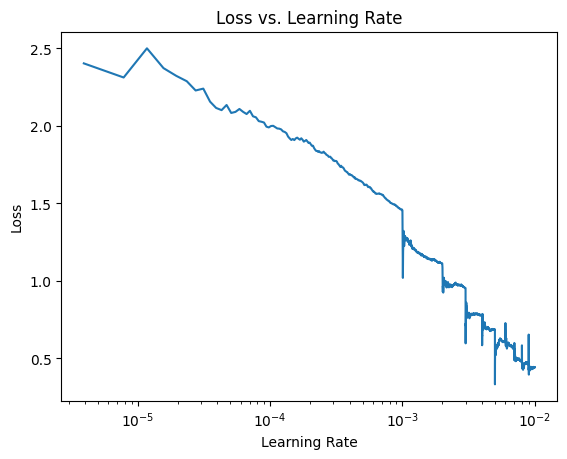

In [6]:
model.unfreeze()
model.lr_find(train_generator, validation_generator, changes_weights=False)

In [27]:
model.unfreeze()
history2 = model.fit_epochs(train_generator, validation_generator, epochs=50, checkpoint_path=model_dir, lr=[2e-2, 1e-2])
histories.append(history2)

All layers have been unfrozen.
Epoch 1/50
256/256 [==============================] - ETA: 0s - loss: 8.7774 - accuracy: 0.4891
Epoch 1: val_loss improved from inf to 7.30778, saving model to ../../models/best_model_iteration_6_1.h5
256/256 [==============================] - 71s 277ms/step - loss: 8.7774 - accuracy: 0.4891 - val_loss: 7.3078 - val_accuracy: 0.5845 - lr: 0.0150
Epoch 2/50
256/256 [==============================] - ETA: 0s - loss: 6.4732 - accuracy: 0.5804
Epoch 2: val_loss did not improve from 7.30778
256/256 [==============================] - 70s 275ms/step - loss: 6.4732 - accuracy: 0.5804 - val_loss: 10.3596 - val_accuracy: 0.5503 - lr: 0.0150
Epoch 3/50
256/256 [==============================] - ETA: 0s - loss: 5.7244 - accuracy: 0.6150
Epoch 3: val_loss did not improve from 7.30778
256/256 [==============================] - 68s 266ms/step - loss: 5.7244 - accuracy: 0.6150 - val_loss: 10.2537 - val_accuracy: 0.5347 - lr: 0.0150
Epoch 4/50
256/256 [===================

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.6204182669230976
Accuracy on test set: 0.7083333134651184
F1 Score: 0.7309695116513254


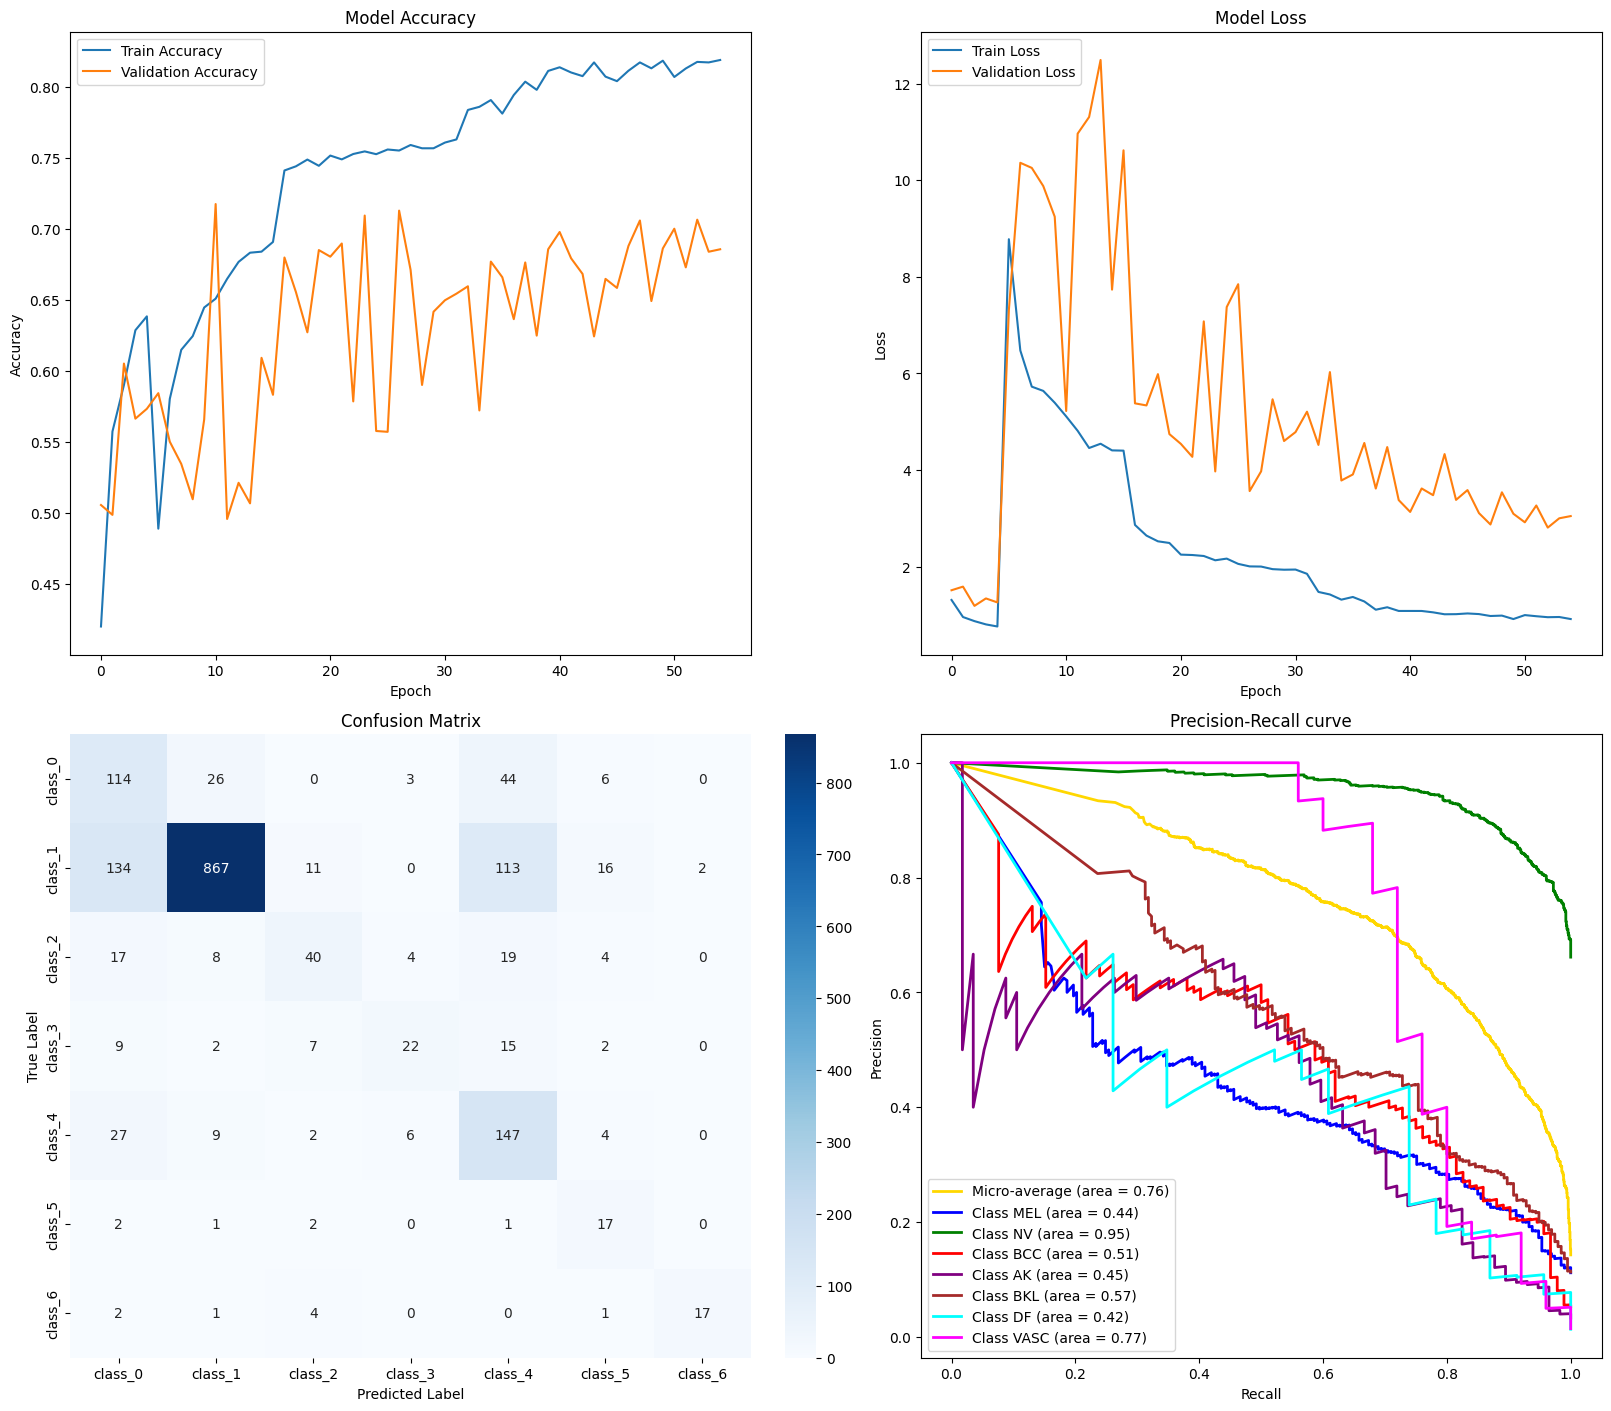

In [28]:
from tensorflow.keras.models import load_model
from plot_utils import show_all_plots

m = load_model(model_dir)
show_all_plots(histories, m, test_generator)

# Iteration 6.2

Adam

In [9]:
data_dir = "../../Merge Set Ordered"
iteration = "iteration_6_2"
model_dir = f'../../models/best_model_{iteration}.h5'

In [10]:
from keras.applications.mobilenet_v3 import preprocess_input


# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory


batch_size=32
dist = [1171,1171,1171,1171,1171,1171,1171]
print(sum(dist))
histories = []

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders() 

8197
Found 8202 images belonging to 7 classes (dist says 8197)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [11]:
# Example AUC scores for each class (from the PR curve)
auc_scores = [0.51, 0.96, 0.81, 0.55, 0.64, 0.66, 0.92]  # Replace with your actual AUC values

# Calculate weights inversely proportional to AUC scores
class_weights = {i: 1 / score for i, score in enumerate(auc_scores)}

# Normalize the weights to keep them reasonably scaled
max_weight = max(class_weights.values())
class_weights = {k: v / max_weight for k, v in class_weights.items()}

weights = class_weights

print("Class Weights:", class_weights)

Class Weights: {0: 1.0, 1: 0.5312500000000001, 2: 0.6296296296296297, 3: 0.9272727272727272, 4: 0.796875, 5: 0.7727272727272727, 6: 0.5543478260869565}


In [12]:
import sys
import os
sys.path.append(os.path.abspath("../.."))
from custom_model_iteration_6 import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile(optimizer="ADAM")

In [13]:
history1 = model.fit_epochs(train_generator, validation_generator, epochs=5, class_weight=weights, checkpoint_path=model_dir)
histories.append(history1)

Epoch 1/5
256/256 [==============================] - ETA: 0s - loss: 2.1703 - accuracy: 0.5239
Epoch 1: val_loss improved from inf to 3.40305, saving model to ../../models/best_model_iteration_6_2.h5
256/256 [==============================] - 69s 263ms/step - loss: 2.1703 - accuracy: 0.5239 - val_loss: 3.4030 - val_accuracy: 0.5480 - lr: 0.0010
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 2.0900 - accuracy: 0.6080
Epoch 2: val_loss did not improve from 3.40305
256/256 [==============================] - 72s 281ms/step - loss: 2.0900 - accuracy: 0.6080 - val_loss: 5.0152 - val_accuracy: 0.4363 - lr: 0.0010
Epoch 3/5
256/256 [==============================] - ETA: 0s - loss: 2.0230 - accuracy: 0.6436
Epoch 3: val_loss did not improve from 3.40305
256/256 [==============================] - 72s 280ms/step - loss: 2.0230 - accuracy: 0.6436 - val_loss: 4.1053 - val_accuracy: 0.5723 - lr: 0.0010
Epoch 4/5
256/256 [==============================] - ETA: 0s - loss: 1.9506 - accuracy: 0.6746
Epoch 4: val_loss improved from 3.40305 to 3.24761, saving model to ../../models/best_model_iteration_6_2.h5
256/256 [==============================] - 81s 316ms/step - loss: 1.9506 - accuracy: 0.6746 - val_loss: 3.2476 - val_accuracy: 0.6395 - lr: 0.0010
Epoch 5/5
256/256 [==============================] - ETA: 0s - loss: 2.0225 - acc

In [ ]:
model.unfreeze()
model.lr_find(train_generator, validation_generator, changes_weights=False)

In [14]:
model.unfreeze()
history2 = model.fit_epochs(train_generator, validation_generator, epochs=50, checkpoint_path=model_dir, lr=[1e-4, 1e-3])
histories.append(history2)

All layers have been unfrozen.
Epoch 1/50
256/256 [==============================] - ETA: 0s - loss: 1.5571 - accuracy: 0.7173
Epoch 1: val_loss improved from inf to 4.01689, saving model to ../../models/best_model_iteration_6_2.h5
256/256 [==============================] - 631s 2s/step - loss: 1.5571 - accuracy: 0.7173 - val_loss: 4.0169 - val_accuracy: 0.5758 - lr: 5.5000e-04
Epoch 2/50


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - ETA: 0s - loss: 1.4916 - accuracy: 0.7180
Epoch 2: val_loss did not improve from 4.01689
256/256 [==============================] - 74s 289ms/step - loss: 1.4916 - accuracy: 0.7180 - val_loss: 4.2073 - val_accuracy: 0.5694 - lr: 5.5000e-04
Epoch 3/50
256/256 [==============================] - ETA: 0s - loss: 1.3557 - accuracy: 0.7362
Epoch 3: val_loss improved from 4.01689 to 4.00458, saving model to ../../models/best_model_iteration_6_2.h5
256/256 [==============================] - 73s 283ms/step - loss: 1.3557 - accuracy: 0.7362 - val_loss: 4.0046 - val_accuracy: 0.5747 - lr: 5.5000e-04
Epoch 4/50
256/256 [==============================] - ETA: 0s - loss: 1.3095 - accuracy: 0.7404
Epoch 4: val_loss improved from 4.00458 to 3.54520, saving model to ../../models/best_model_iteration_6_2.h5
256/256 [==============================] - 73s 285ms/step - loss: 1.3095 - accuracy: 0.7404 - val_loss: 3.5452 - val_accuracy: 0.6071 - lr: 5.5000e-04
Epoch

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.6503411909632776
Accuracy on test set: 0.71875
F1 Score: 0.7398845357717448


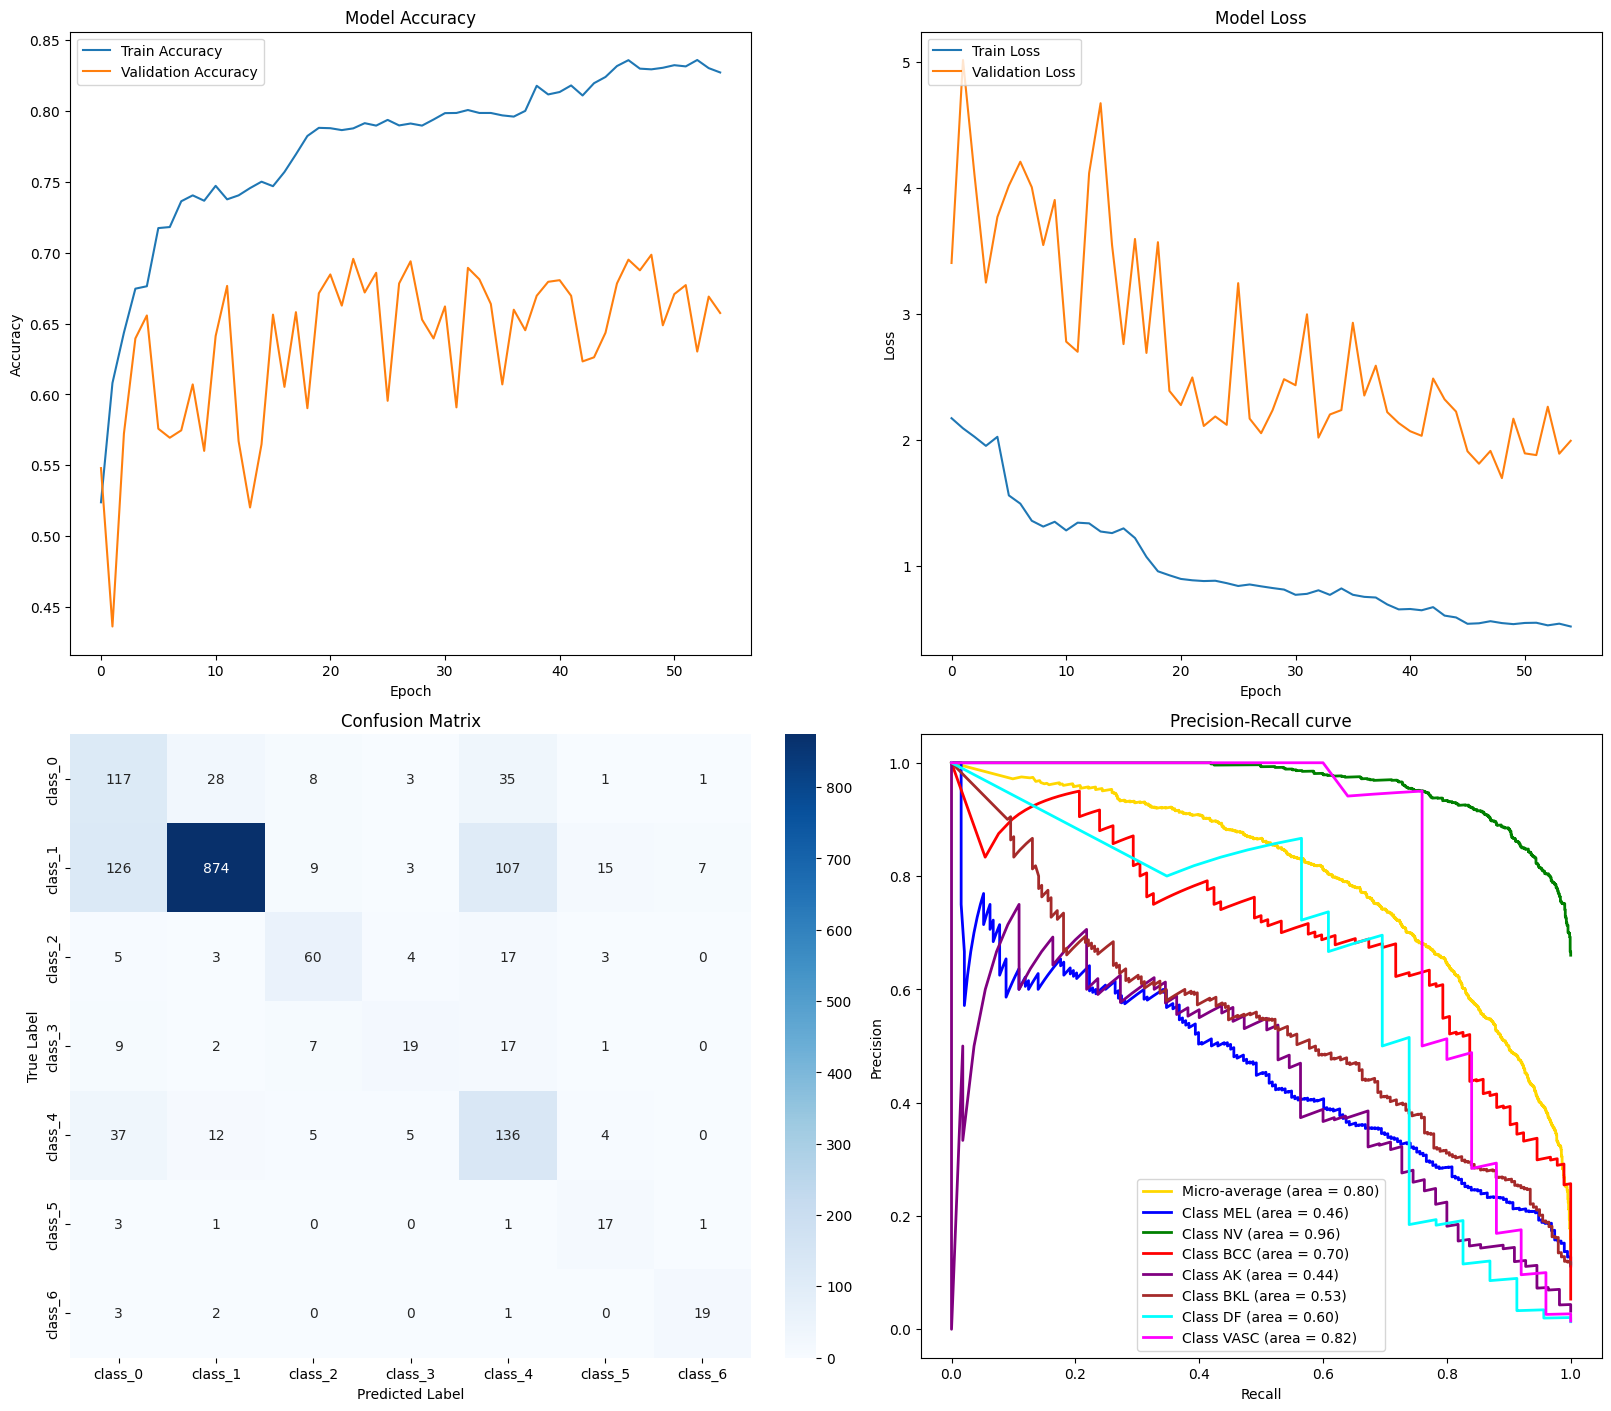

In [15]:
from tensorflow.keras.models import load_model

m = load_model(model_dir)
show_all_plots(histories, m, test_generator)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, precision_recall_curve, average_precision_score, f1_score
from sklearn.preprocessing import label_binarize

class CombinedHistory:
    def __init__(self, combined_history_dict):
        self.history = combined_history_dict

def combine_histories(histories):
    combined_history = {}
    for key in histories[0].history.keys():
        combined_history[key] = []
        for history in histories:
            combined_history[key].extend(history.history[key])
    return CombinedHistory(combined_history)

# Define the function to plot all metrics including balanced accuracy
def show_all_plots(histories, model, validation_generator):


    if isinstance(histories, list):  # Check if it's a list of histories
        history = combine_histories(histories)
    else:  # If single history is passed, use it directly
        history = histories.history
    


    # Assuming `validation_generator` has class indices mapped to class names
    class_names = list(validation_generator.class_names)
    print(class_names)

    # Calculate balanced accuracy for each epoch

    # Get true labels and predictions for the entire validation set
    y_true = []
    y_pred = []

    for i in range(len(validation_generator)):
        X_val_batch, y_val_batch = validation_generator[i]
        y_pred_batch = model.predict(X_val_batch, verbose=0)
        y_pred.extend(y_pred_batch)  # Keep the raw probabilities for precision-recall
        y_true.extend(y_val_batch)   # Keep the one-hot encoded true labels

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate balanced accuracy, confusion matrix, and F1 score
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    balanced_acc = balanced_accuracy_score(y_true_labels, y_pred_labels)
    conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

    # Print metrics
    print(f"Balanced Accuracy: {balanced_acc}")
    print(f"Accuracy on test set: {model.evaluate(validation_generator, verbose=0)[1]}")
    print(f"F1 Score: {f1_score(y_true_labels, y_pred_labels, average='weighted')}")

    # Set up a 2x2 grid for the plots
    plt.figure(figsize=(16,14), constrained_layout=True)
    
    # 1. Accuracy plot
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # 2. Loss plot
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # 3. Confusion matrix plot
    plt.subplot(2, 2, 3)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # 4. Precision-Recall Curve plot
    plt.subplot(2, 2, 4)
    show_precision_recall(y_true, y_pred)

    # Show all the plots
    plt.show()

def show_precision_recall(y_test, predictions):
    class_names = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC']
    
    # Binarize the output for multiclass
    y_test = label_binarize(y_test, classes=range(len(class_names)))
    predictions = np.array(predictions)

    precision = dict()
    recall = dict()
    average_precision = dict()
    
    # Compute Precision-Recall and average precision for each class
    for i in range(len(class_names)):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], predictions[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], predictions[:, i])

    # Compute micro-average Precision-Recall curve and area
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), predictions.ravel())
    average_precision["micro"] = average_precision_score(y_test, predictions, average="micro")
    
    # Plot Precision-Recall curve
    plt.plot(recall["micro"], precision["micro"], color='gold', lw=2, label=f'Micro-average (area = {average_precision["micro"]:0.2f})')
    for i, color in enumerate(['blue', 'green', 'red', 'purple', 'brown', 'cyan', 'magenta']):
        plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Class {class_names[i]} (area = {average_precision[i]:0.2f})')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc='best')
